In [ ]:
#!pip install kaggle

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
#!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:07<00:00, 105MB/s]
100% 812M/812M [00:07<00:00, 110MB/s]


In [ ]:
#!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
import os

path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('number of images:', file_count)

number of images: 25000


printing the names of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.6044.jpg', 'dog.6786.jpg', 'cat.11106.jpg', 'cat.11855.jpg', 'cat.1929.jpg', 'dog.5236.jpg', 'dog.7356.jpg', 'cat.6600.jpg', 'cat.1059.jpg', 'dog.5949.jpg', 'dog.2239.jpg', 'cat.2071.jpg', 'dog.5648.jpg', 'dog.2769.jpg', 'dog.2179.jpg', 'dog.4119.jpg', 'dog.8157.jpg', 'cat.639.jpg', 'cat.10171.jpg', 'cat.9959.jpg', 'dog.5824.jpg', 'cat.11027.jpg', 'dog.10736.jpg', 'dog.9081.jpg', 'dog.3212.jpg', 'dog.11829.jpg', 'dog.10241.jpg', 'dog.8568.jpg', 'dog.9597.jpg', 'cat.4821.jpg', 'cat.2232.jpg', 'dog.3074.jpg', 'cat.6190.jpg', 'dog.1727.jpg', 'cat.6074.jpg', 'cat.5846.jpg', 'dog.12324.jpg', 'dog.1778.jpg', 'cat.8702.jpg', 'cat.2741.jpg', 'dog.8790.jpg', 'cat.2984.jpg', 'dog.11254.jpg', 'cat.1628.jpg', 'cat.9716.jpg', 'dog.1133.jpg', 'dog.3324.jpg', 'dog.6011.jpg', 'dog.6247.jpg', 'dog.10977.jpg', 'cat.1893.jpg', 'dog.4790.jpg', 'cat.1444.jpg', 'dog.10566.jpg', 'cat.4647.jpg', 'dog.1927.jpg', 'dog.6086.jpg', 'cat.6559.jpg', 'cat.9293.jpg', 'cat.9925.jpg', 'dog.8798.jpg', 'dog.7011.jpg

libraries required

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display the image

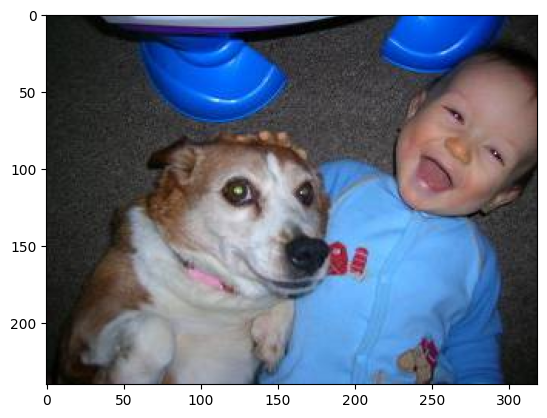

In [ ]:
img = mpimg.imread('/content/train/dog.41.jpg')
imgplot =plt.imshow(img)
plt.show()

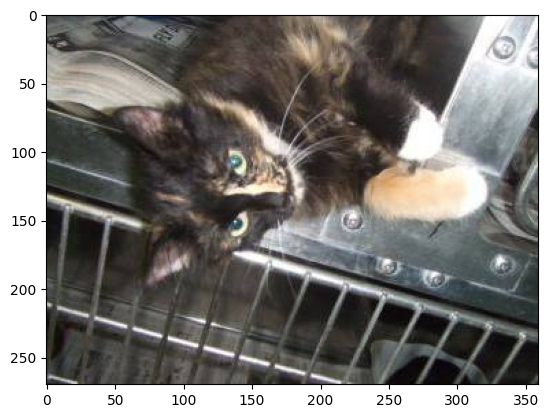

In [ ]:
img = mpimg.imread('/content/train/cat.12182.jpg')
imgplot =plt.imshow(img)
plt.show()

Resizing all the images

In [ ]:
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])


dog
dog
cat
cat
cat


In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count+=1

  else:
    cat_count+=1

print('no of dog images:',dog_count)
print('no of dog images:',cat_count)

no of dog images: 12500
no of dog images: 12500


In [ ]:
#creating new directory

os.mkdir('/content/image_Resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_Resized/'

for i in range(2000):

  file_name = os.listdir(original_folder)[i]
  img_path = original_folder+file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+file_name
  img.save(newImgPath)

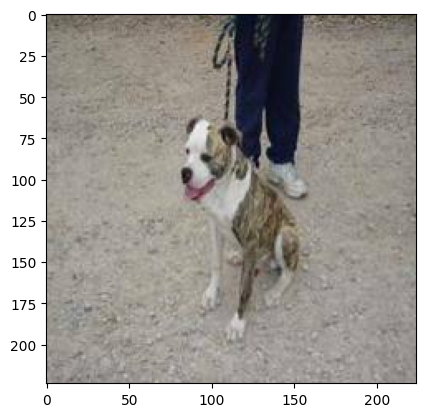

In [ ]:
img = mpimg.imread('/content/image_Resized/dog.4119.jpg')
imgplot =plt.imshow(img)
plt.show()

Creating the labels for resized images

cat-->0
dog-->1

In [ ]:
file_names = os.listdir('/content/image_Resized')

labels=[]

for i in range(2000):
  file_name = file_names[i]
  label=file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(file_names[0:12])
print(len(file_names))

['dog.6044.jpg', 'dog.6786.jpg', 'cat.11106.jpg', 'cat.11855.jpg', 'cat.1929.jpg', 'dog.5236.jpg', 'dog.7356.jpg', 'cat.6600.jpg', 'cat.1059.jpg', 'dog.5949.jpg', 'dog.2239.jpg', 'cat.2071.jpg']
2000


In [ ]:
print(labels[0:12])
print(len(labels))

[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
2000


In [ ]:
#counting the images of dogs and cats from 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 981 1019]


converting the images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory ='/content/image_Resized/'
image_extension = ['png','jpg']

files =[]

[files.extend(glob.glob(image_directory +'*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file)for file in files])

In [ ]:
print(dog_cat_images)
dog_cat_images.shape

[[[[ 76  70  75]
   [ 48  42  47]
   [ 42  39  41]
   ...
   [138 143 141]
   [110 116 111]
   [ 97 103  98]]

  [[ 70  64  69]
   [ 52  46  51]
   [ 50  47  49]
   ...
   [128 133 131]
   [114 120 115]
   [113 119 114]]

  [[ 66  60  65]
   [ 58  52  57]
   [ 60  57  59]
   ...
   [122 125 123]
   [128 131 129]
   [139 142 140]]

  ...

  [[ 63  55  55]
   [ 64  56  56]
   [ 68  61  58]
   ...
   [ 74  66  53]
   [ 66  58  45]
   [ 70  62  49]]

  [[ 60  52  52]
   [ 61  53  53]
   [ 68  61  58]
   ...
   [ 57  49  36]
   [ 82  74  61]
   [124 116 103]]

  [[ 64  56  56]
   [ 63  55  55]
   [ 66  59  56]
   ...
   [ 85  77  64]
   [121 113 100]
   [155 147 134]]]


 [[[132  95  69]
   [136  99  73]
   [143 106  80]
   ...
   [ 46  54  71]
   [ 46  53  70]
   [ 46  53  70]]

  [[135  99  75]
   [136 101  75]
   [138 102  78]
   ...
   [ 46  54  71]
   [ 46  53  70]
   [ 46  53  70]]

  [[136 102  79]
   [135 101  77]
   [134 100  77]
   ...
   [ 45  52  71]
   [ 46  52  71]
   [ 46  52

(2000, 224, 224, 3)

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
x = dog_cat_images
y = np.asarray(labels)

In [ ]:
print(y)

[1 1 0 ... 0 0 1]


In [ ]:
#train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -->training images
400--> test images

In [ ]:
#scaling

x_train_scaled = x_train/255

x_test_scaled = x_test/255

Building the neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)

In [ ]:
number_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(number_of_classes)
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 72s 1s/step - loss: 0.1549 - acc: 0.9413
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0592 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0411 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 59s 1s/step - loss: 0.0322 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 82s 2s/step - loss: 0.0233 - acc: 0.9950


In [ ]:
score, acc = model.evaluate(x_test_scaled,y_test)
print('test loss =',score)
print('test accuracy=',acc)

13/13 [==============================] - 16s 1s/step - loss: 0.1488 - acc: 0.9675
test loss = 0.14881472289562225
test accuracy= 0.9674999713897705


Predictive system

path of the image to be predicted:/content/Dog_Breeds.jpg


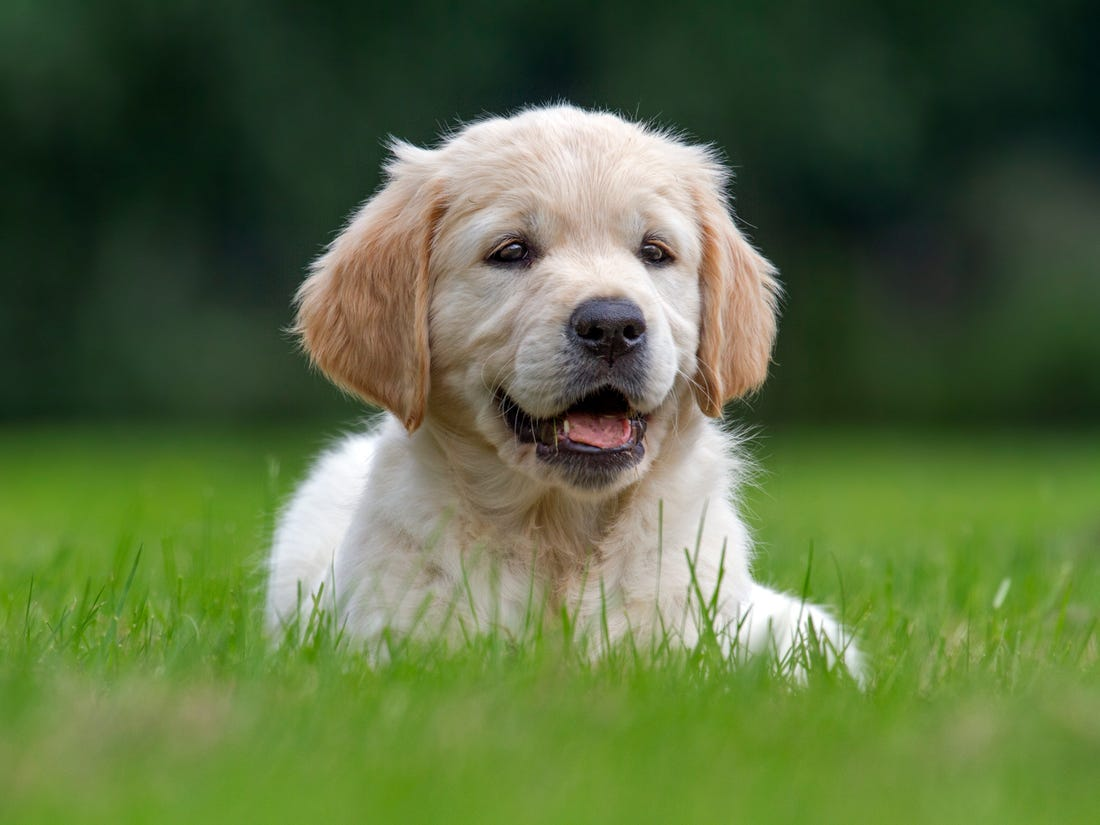

1/1 [==============================] - 2s 2s/step
[[-4.5833626  4.9126377]]
1
the image represents a dog


In [52]:
input_image_path = input('path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_pred = model.predict(image_reshaped)

print(input_pred)

input_pred_label = np.argmax(input_pred)

print(input_pred_label)

if input_pred_label == 0:
  print('the image represents a cat')
else:
  print('the image represents a dog')

path of the image to be predicted:/content/2560px-A-Cat.jpg


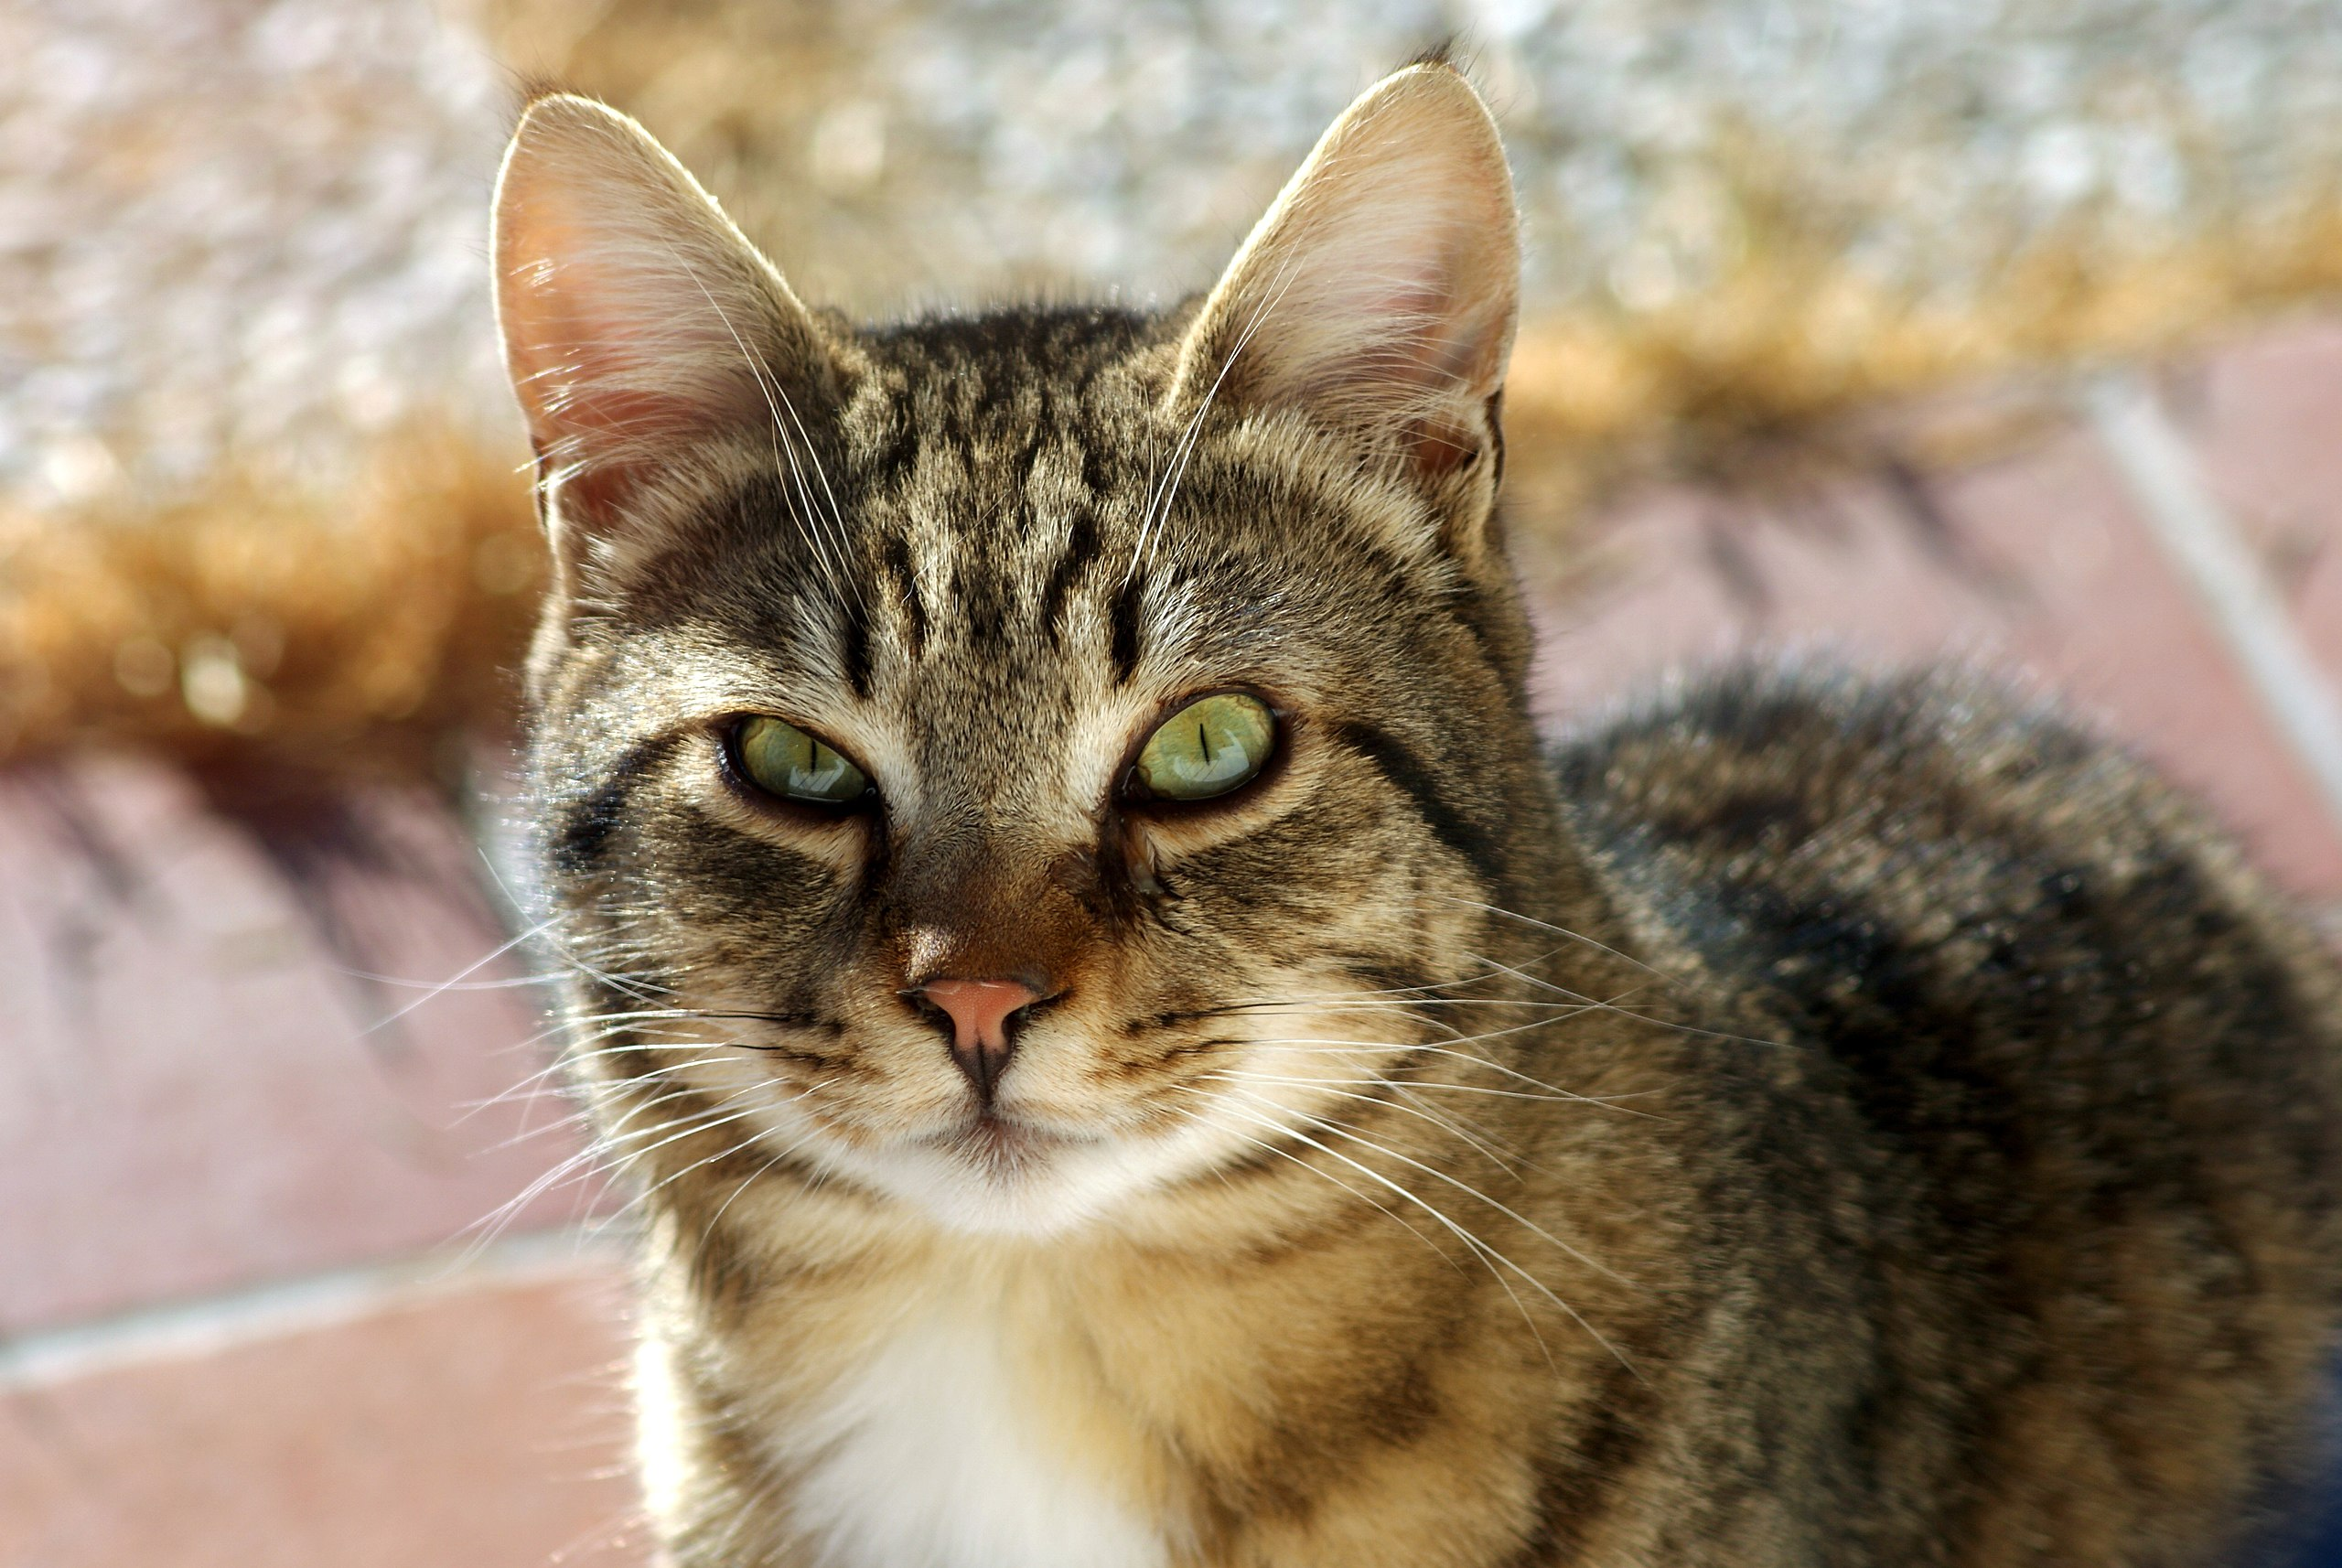

1/1 [==============================] - 0s 89ms/step
[[ 2.3486345 -2.949909 ]]
0
the image represents a cat


In [53]:
input_image_path = input('path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_pred = model.predict(image_reshaped)

print(input_pred)

input_pred_label = np.argmax(input_pred)

print(input_pred_label)

if input_pred_label == 0:
  print('the image represents a cat')
else:
  print('the image represents a dog')